# Wine Quality Prediction

**Objective:**
The goal of this project is to predict the quality of wine based on its
chemical characteristics such as acidity, density, and alcohol content.
This project demonstrates the use of multiple classification models
in a real-world machine learning application.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

sns.set(style="whitegrid")


The wine quality dataset is loaded directly as it is already available
in the Jupyter environment.


In [2]:
df = pd.read_csv("WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


This step helps understand the structure of the dataset,
data types, and basic statistics.


In [3]:
df.shape


(1143, 13)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


The dataset is checked for missing values and unnecessary columns.


In [6]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
# Drop unnecessary index column if present
df = df.drop(columns=['Id'], errors='ignore')


The wine quality score is converted into a binary classification problem:
- Good quality wine (quality ≥ 7)
- Poor quality wine (quality < 7)


In [8]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


The dataset is split into input features and target variable.


In [9]:
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']


Feature scaling is applied to normalize chemical attributes
for better model performance.


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The dataset is divided into training and testing sets.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Random Forest is an ensemble learning method that improves
prediction accuracy by combining multiple decision trees.


In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


In [13]:
accuracy_score(y_test, rf_pred)


0.9126637554585153

SGD is an efficient optimization technique used for large-scale
machine learning problems.


In [14]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

sgd_pred = sgd_model.predict(X_test)


In [15]:
accuracy_score(y_test, sgd_pred)


0.8558951965065502

Support Vector Classifier separates data points using an optimal
decision boundary.


In [16]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)


In [17]:
accuracy_score(y_test, svc_pred)


0.8908296943231441

The performance of all three classifiers is compared using accuracy.


In [18]:
model_scores = pd.DataFrame({
    'Model': ['Random Forest', 'SGD Classifier', 'SVC'],
    'Accuracy': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, sgd_pred),
        accuracy_score(y_test, svc_pred)
    ]
})

model_scores


,Model,Accuracy
0,Random Forest,0.912664
1,SGD Classifier,0.855895
2,SVC,0.890830


A visualization is created to compare model performance.


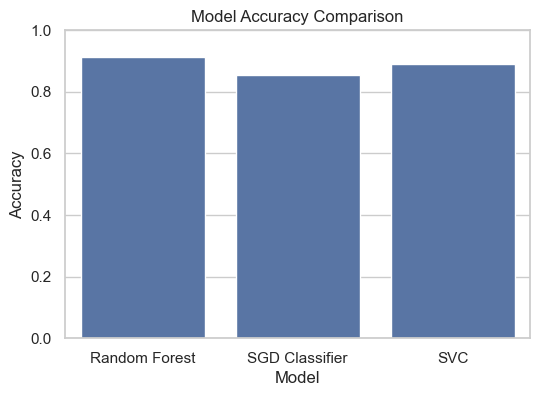

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=model_scores)
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


The best-performing model is analyzed in detail using
a classification report and confusion matrix.


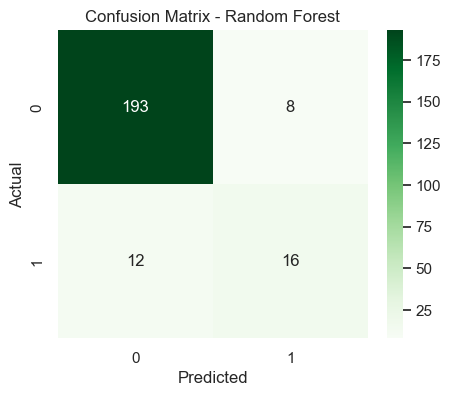

In [20]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Conclusion

In this project, wine quality was predicted using chemical properties
of wine samples. Three classification models—Random Forest, SGD Classifier,
and Support Vector Classifier—were implemented and evaluated.

Among the models, Random Forest performed the best in terms of accuracy.
This project provided practical experience in data preprocessing,
feature scaling, classification models, and performance evaluation.
